<a href="https://colab.research.google.com/github/anastasiashapoval/machine-learning/blob/main/%D0%BB%D1%803_%D0%BC%D0%BD_%D1%88%D0%B0%D0%BF%D0%BE%D0%B2%D0%B0%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()

Saving house_price_regression_dataset.csv to house_price_regression_dataset (3).csv


In [8]:
df = pd.read_csv('house_price_regression_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [25]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [19]:
df['Neighborhood_Quality'].value_counts()

,count
Neighborhood_Quality,
10,123
5,109
2,105
7,102
6,101
4,99
8,97
1,91
9,88


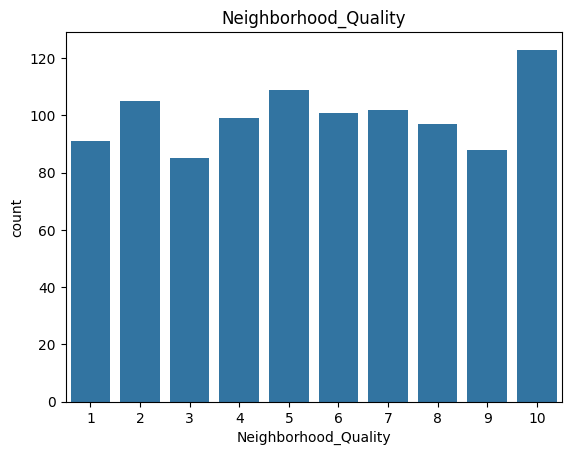

In [20]:
sns.countplot(x='Neighborhood_Quality', data=df)
plt.title('Neighborhood_Quality')
plt.show()

In [16]:
df['Num_Bathrooms'].value_counts()

,count
Num_Bathrooms,
1,350
2,327
3,323


In [ ]:
sns.pairplot(df)

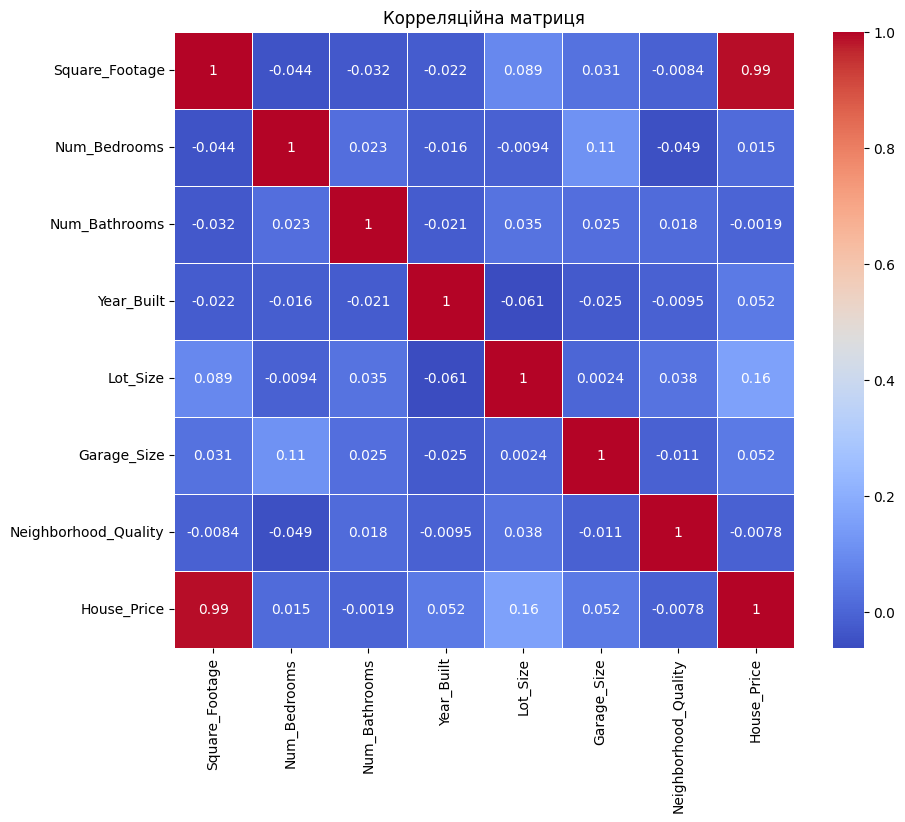

In [23]:
cor_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляційна матриця')
plt.show()

In [31]:
cor_with_hp = cor_matrix['House_Price'].sort_values(ascending=False)
cor_with_hp

,House_Price
House_Price,1.000000
Square_Footage,0.991261
Lot_Size,0.160412
Garage_Size,0.052133
Year_Built,0.051967
Num_Bedrooms,0.014633
Num_Bathrooms,-0.001862
Neighborhood_Quality,-0.007770


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
X = df.drop(columns=['House_Price'])
y = df['House_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model                R²         MAE        MSE       
--------------------------------------------------
Linear Regression    0.998      8174.58     101434798.51


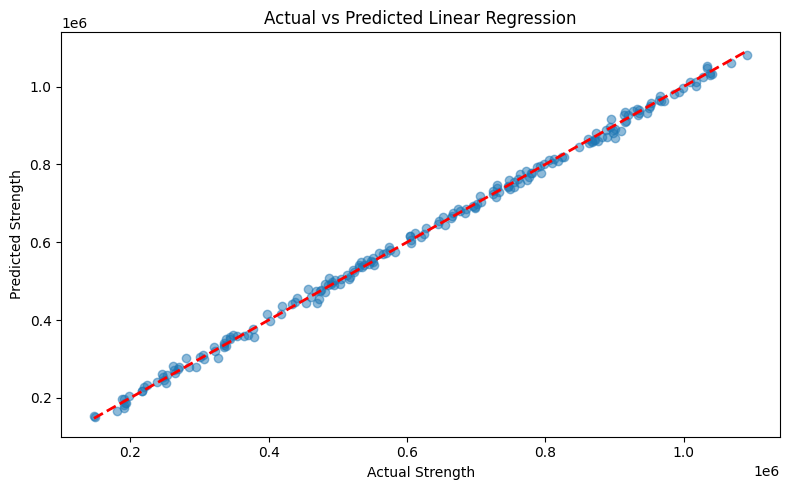

Ridge                0.998      8241.59     102480990.01


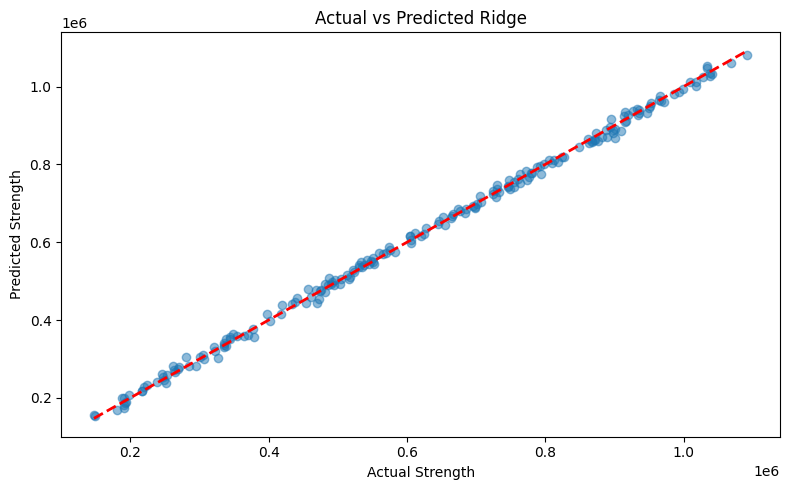

Lasso                0.998      8174.75     101436558.18


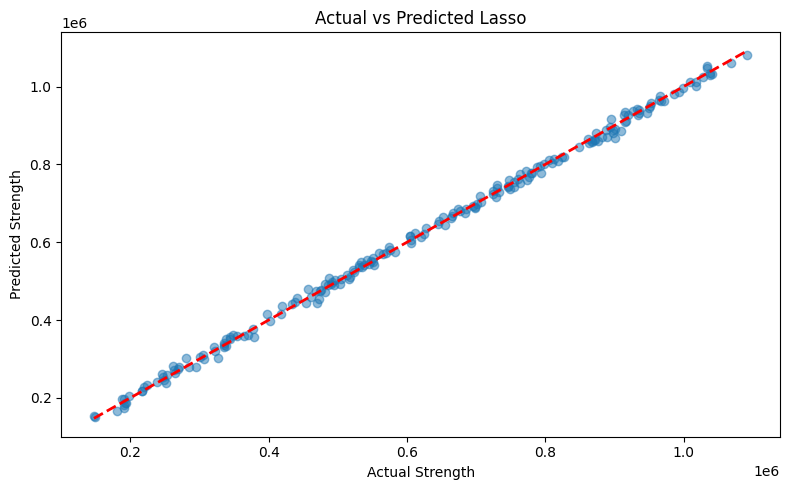

Random Forest        0.994      16015.32     386621150.47


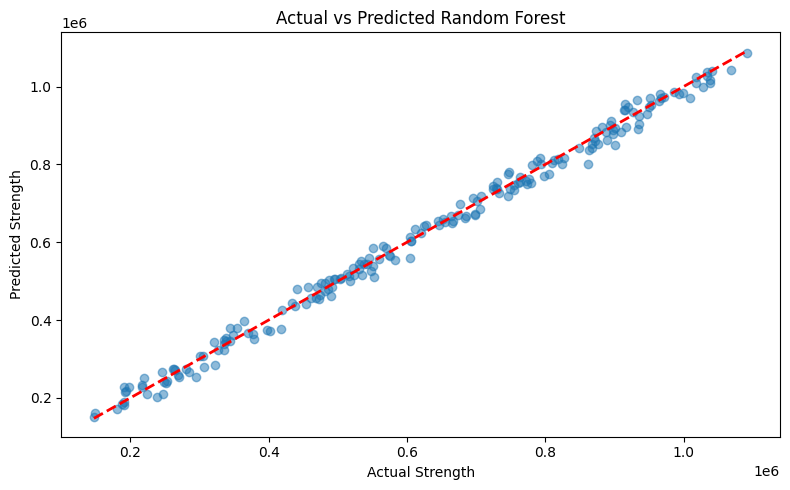

Gradient Boosting    0.997      12314.08     225088784.63


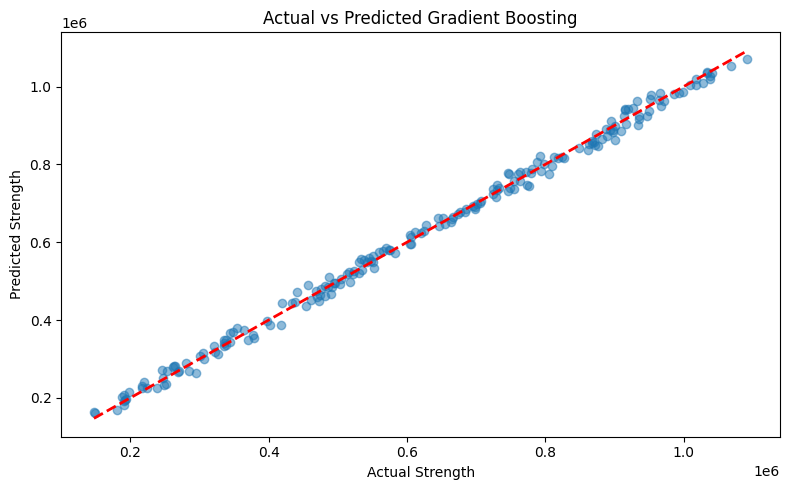

In [47]:
# Моделі
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Результати
print(f"{'Model':<20} {'R²':<10} {'MAE':<10} {'MSE':<10}")
print("-" * 50)

# Створюємо графіки для всіх моделей
for name, model in models.items():
    # Масштабовані лише для лінійних моделей
    if name in ['Random Forest', 'Gradient Boosting']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{name:<20} {r2:.3f}      {mae:.2f}     {mse:.2f}")

    # Побудова графіків
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted {name}')
    plt.xlabel('Actual Strength')
    plt.ylabel('Predicted Strength')
    plt.tight_layout()
    plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [48]:
rf_reg_gs = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(estimator=rf_reg_gs, param_grid = param_rf, cv=3)
rf_search.fit(X_train, y_train)
best_rf_params = rf_search.best_params_

In [49]:
best_rf_params

{'max_depth': None,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 100}

In [50]:
rf_optimal = RandomForestRegressor(**best_rf_params, random_state=42)
rf_optimal.fit(X_train, y_train)
y_pred_rf_optimal = rf_optimal.predict(X_test)

In [51]:
# Розрахунки для тестових даних
rf_mse = mean_squared_error(y_test, y_pred_rf_optimal)
rf_mae = mean_absolute_error(y_test, y_pred_rf_optimal)
rf_r2 = r2_score(y_test, y_pred_rf_optimal)

In [52]:
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

MSE: 394154497.04130006
MAE: 16106.272200602853
R2: 0.9938851770748258


Висновки: під час даної роботи було проведено роботу з датасетом регресії цін на нерухомість. були виконані різні операції: прості, як опис датасету і пошук дублікатів, так і більш складні - кореляційна матриця, сортування значень з кореляційної матриці, оцінка різних моделей регресії за допомогою метрик R², MAE та MSE, передбачення змінної, створення графіків з sns та plt тощо. покращено навички аналізу датасету, а також отримано навички з побудови та тренування різних моделей регресії.
